This notebook aim to make plots from performances

In [1]:
#some libraries

import json
import matplotlib.pyplot as plt
import numpy as np
import re
from UNet_class_and_functions import*

In [5]:
performances_directory = "/home/gabriel/Documents/TR DIMA/data_clean/performances"
N_pt = 18
#opening performances data

file_list = list_directory_contents(performances_directory)

tracked_param = r"param"

param_values_list = []


for name in file_list:
    
    match = re.search(tracked_param+r'='+r'(\d+)', name)


    if match:
        param_value = int(match.group(1))
        print(f"The parameter's value is {param_value}.")
        param_values_list.append(param_value)
    else:
        print("No match found.")

mean_errors = np.zeros((len(param_values_list),N_pt))
global_mean_errors = np.zeros((len(param_values_list)))
misclassifications_rates = np.zeros((len(param_values_list),N_pt))
global_misclassification_rate = np.zeros((len(param_values_list)))

for index,name in enumerate(file_list):

    with open(performances_directory + '/' + name) as file:
        current_performances = json.load(file)
        for key in current_performances.keys():
            b0,b1,m_err,mis_r = current_performances[key]
            if key == 'all':
                global_mean_errors[index] = m_err
                global_misclassification_rate[index] = mis_r
            else:
                key = int(key)
                mean_errors[index,key] = m_err
                misclassifications_rates[index,key] = mis_r









The parameter's value is 2.
The parameter's value is 1.


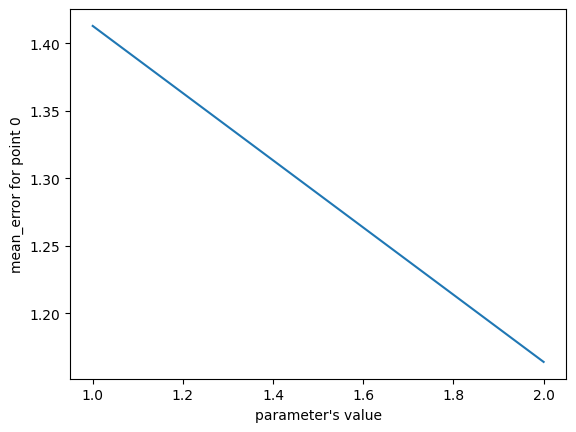

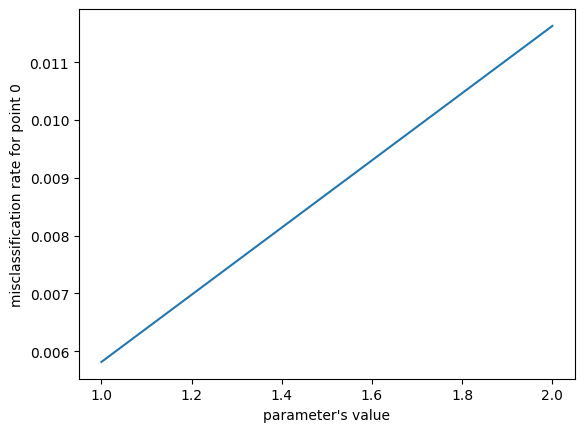

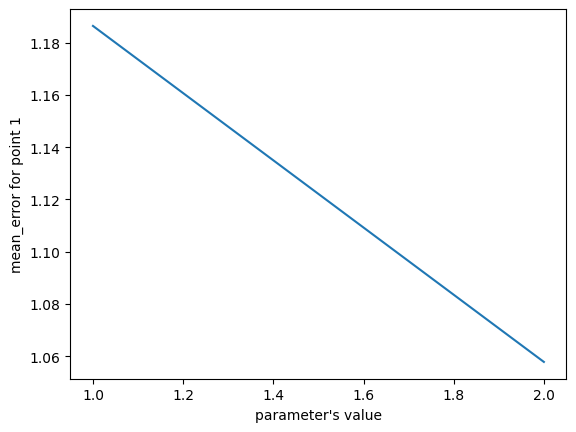

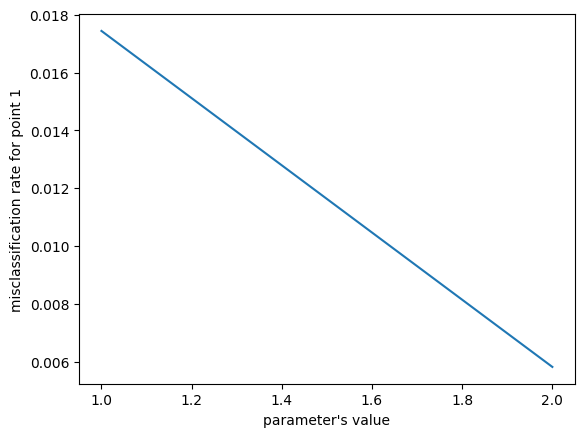

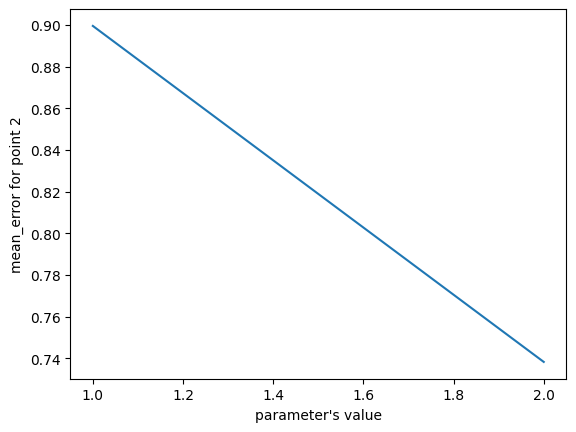

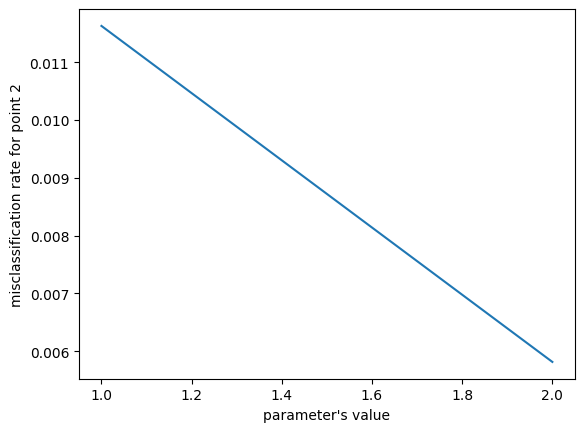

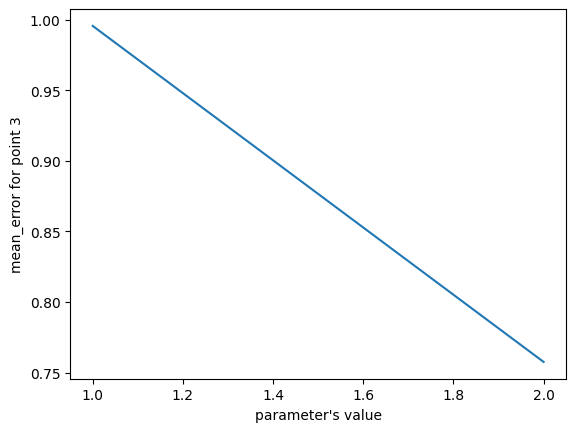

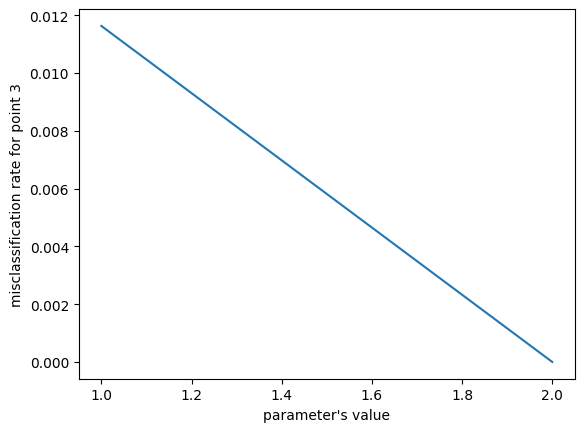

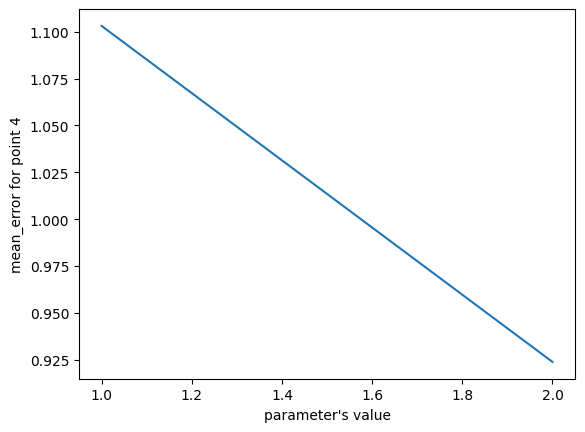

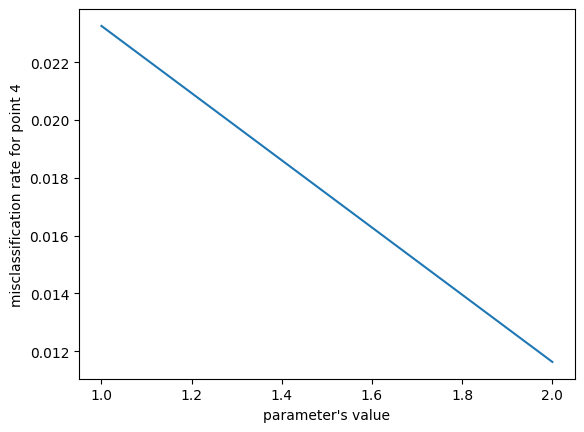

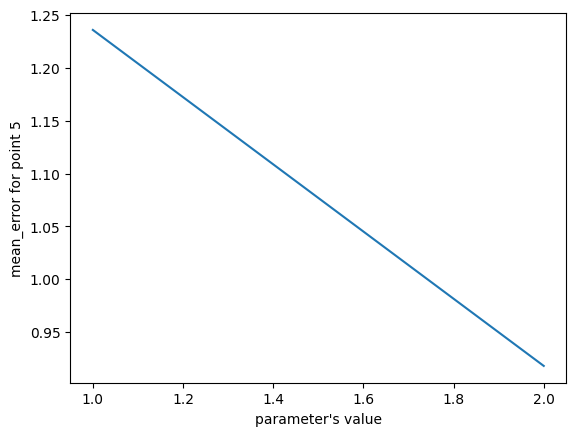

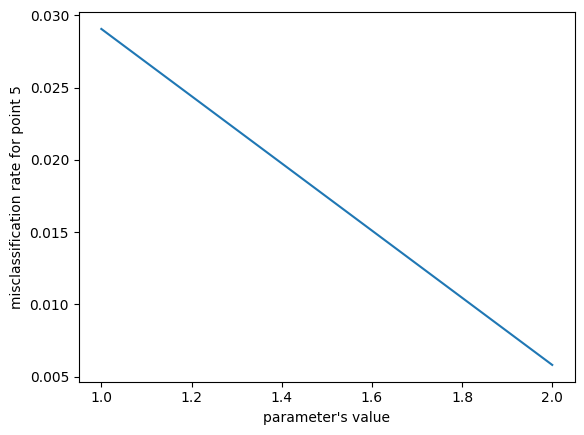

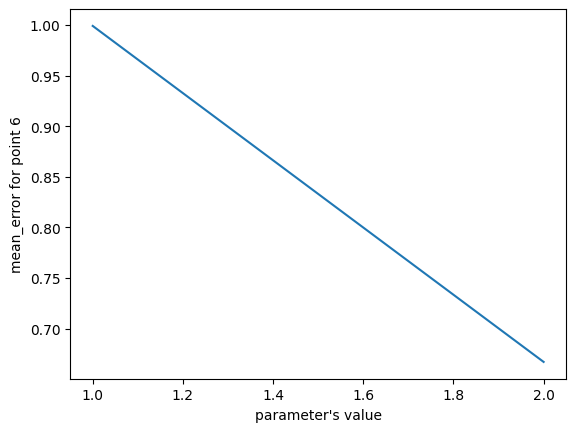

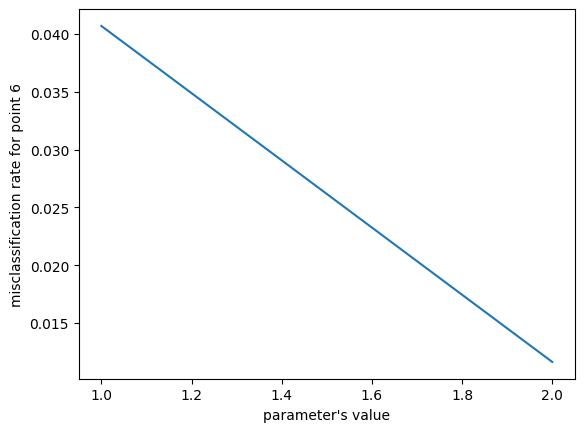

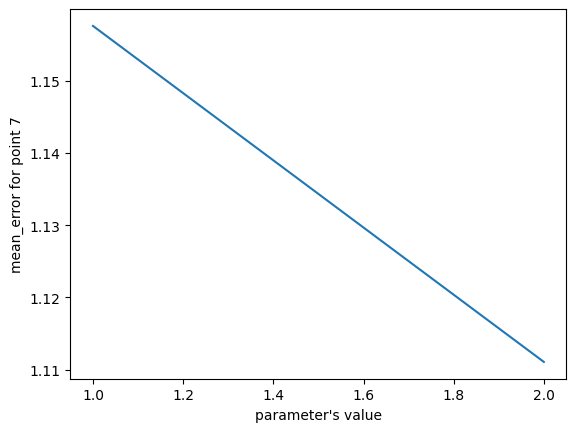

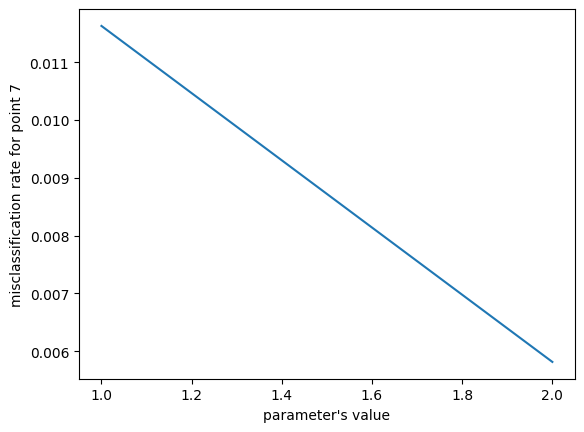

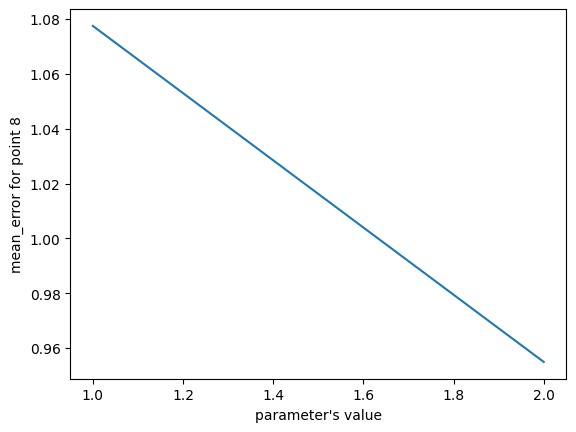

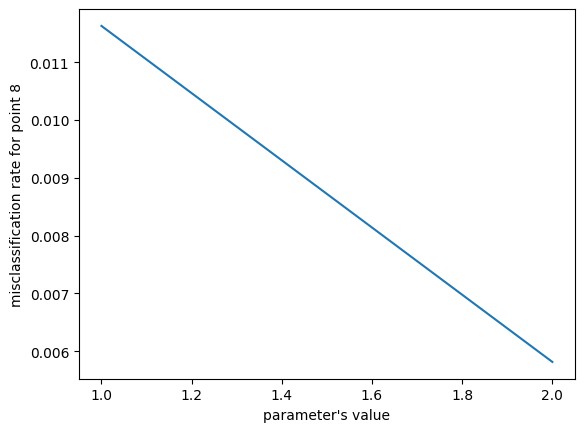

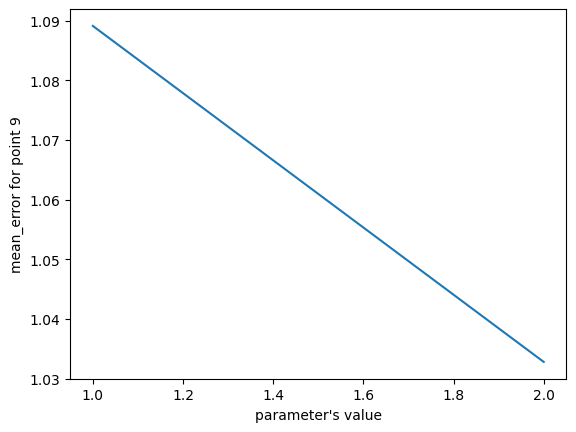

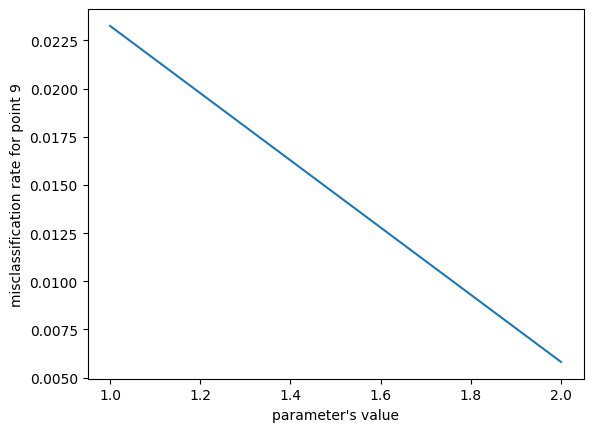

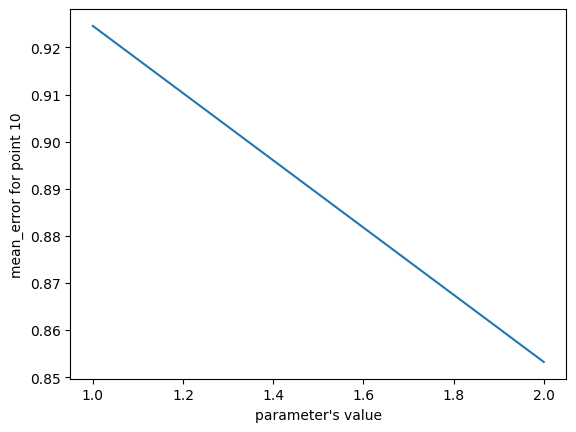

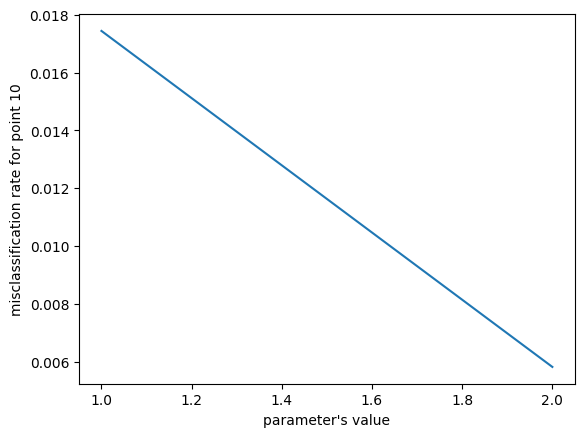

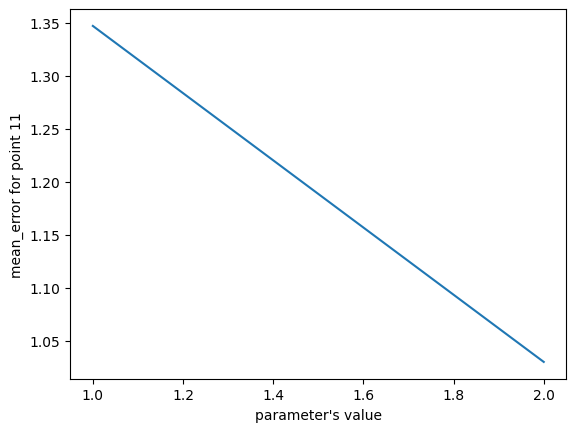

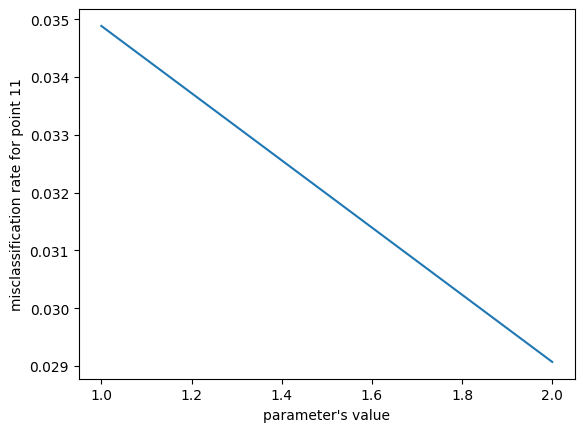

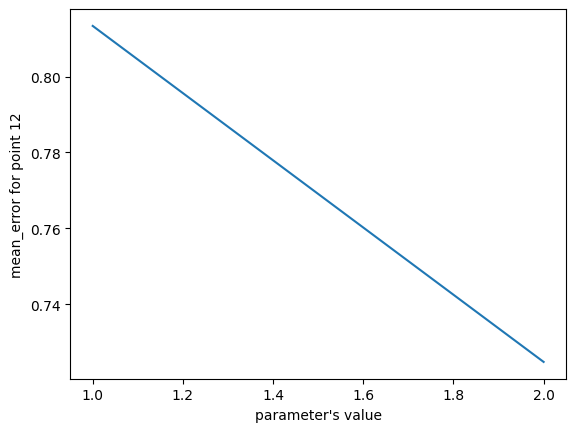

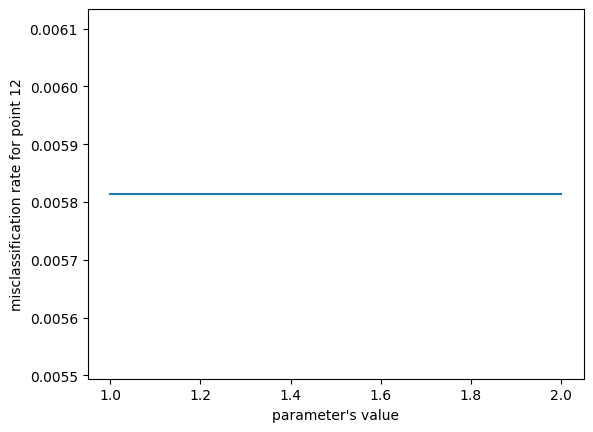

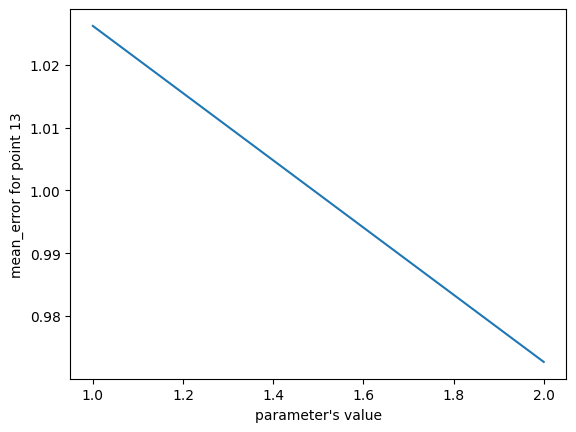

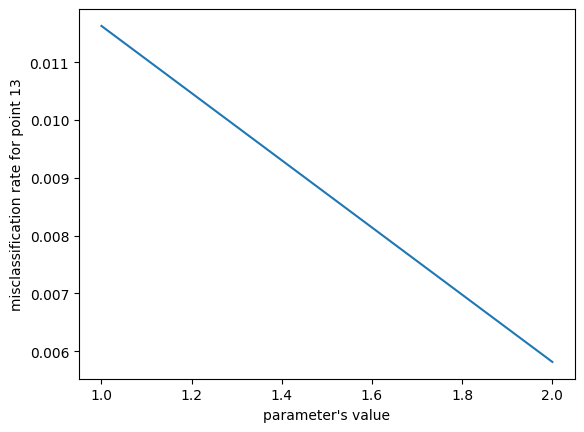

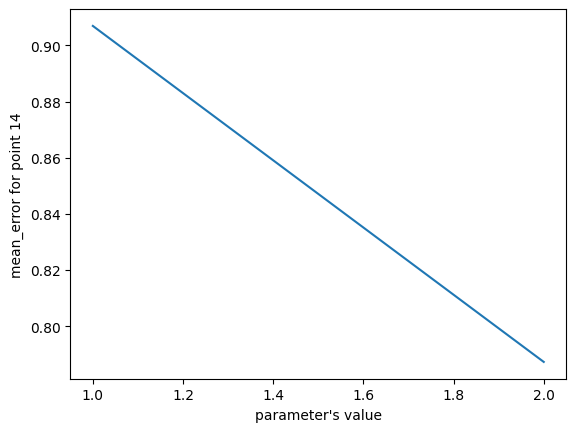

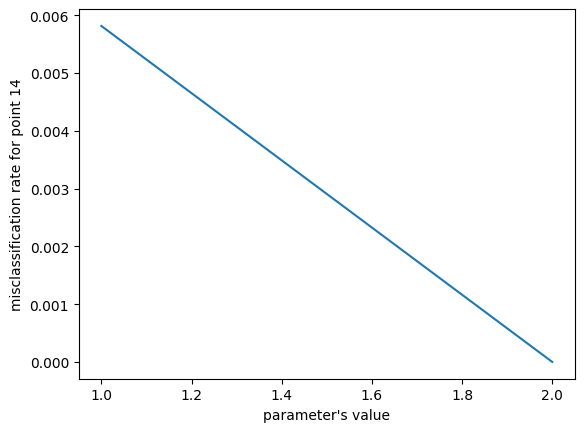

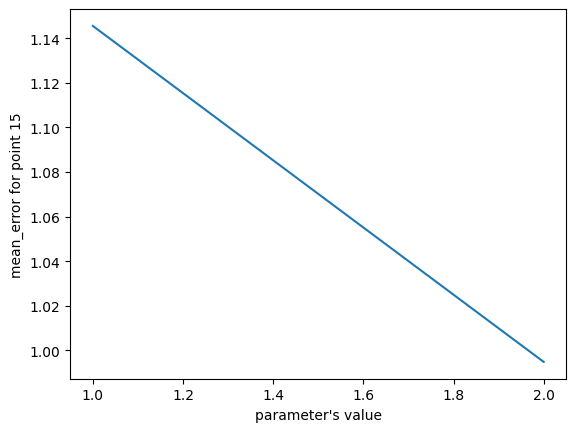

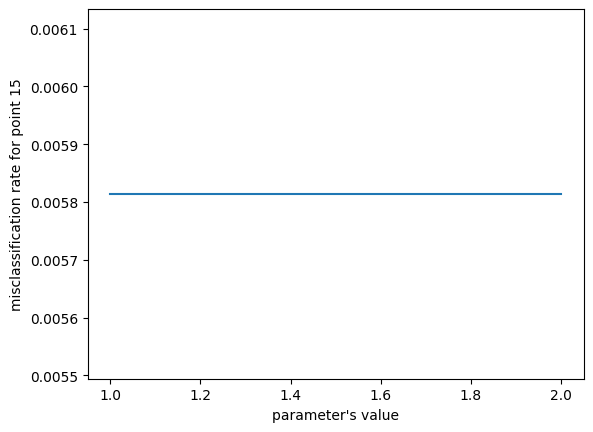

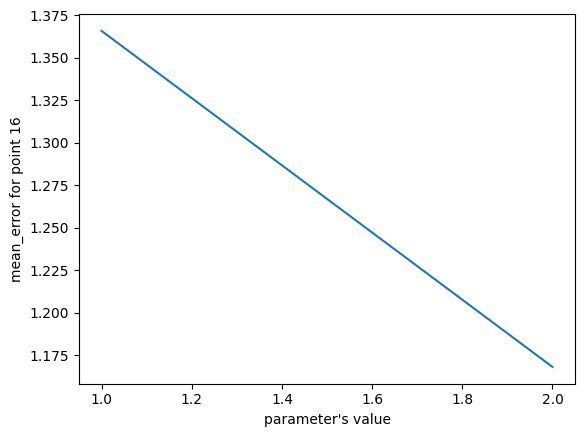

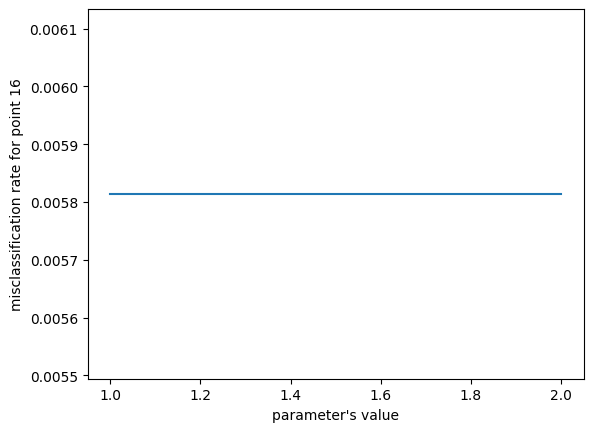

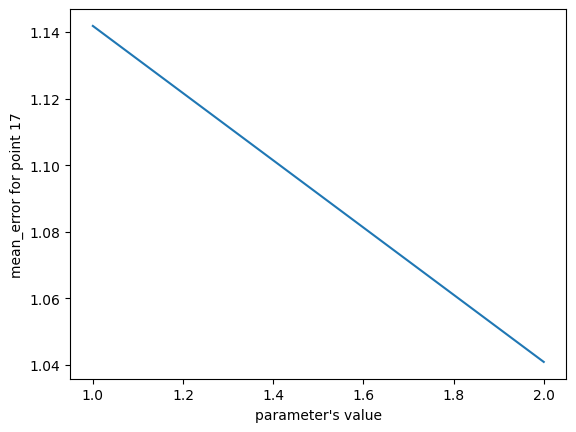

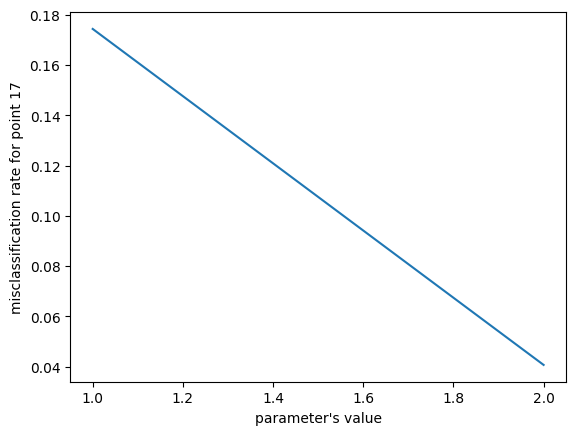

In [8]:
#displaying results for each point

for i in range(N_pt):

    plt.plot(param_values_list,mean_errors[:,i])
    plt.xlabel("parameter's value")
    plt.ylabel(f"mean_error for point {i}")
    plt.show()


    plt.plot(param_values_list,misclassifications_rates[:,i])
    plt.xlabel("parameter's value")
    plt.ylabel(f"misclassification rate for point {i}")    
    plt.show()




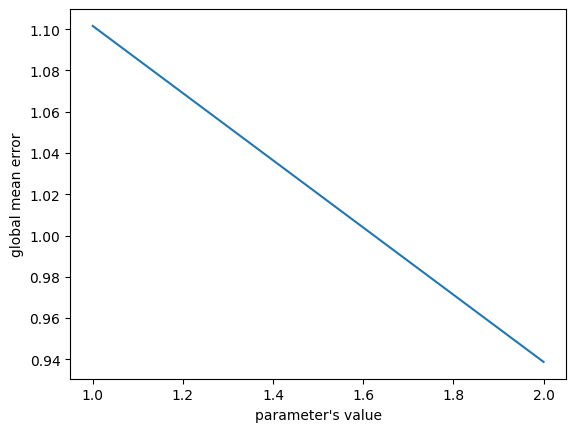

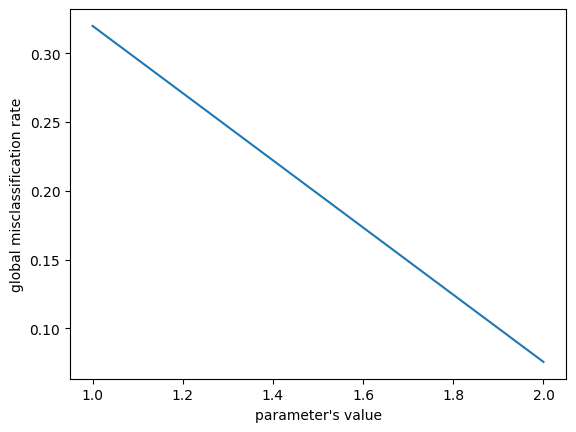

In [9]:
#displaying results for the globality

plt.plot(param_values_list,global_mean_errors)
plt.xlabel("parameter's value")
plt.ylabel(f"global mean error")
plt.show()


plt.plot(param_values_list,global_misclassification_rate)
plt.xlabel("parameter's value")
plt.ylabel(f"global misclassification rate")    
plt.show()

